In [13]:
# load libraries and scripts
using HDF5
using Trapz
using Statistics
include("../scripts/plotting.jl")
include("../scripts/tools.jl")
include("../scripts/get_grid.jl")
include("../scripts/get_params.jl")
include("../scripts/disturbances.jl")
include("../scripts/stable.jl")
include("../scripts/dynamics.jl")

vectorize (generic function with 1 method)

In [14]:
#load borders
border, scale_factor = import_border("../data/borders/border.json");

In [15]:
# create the lattice grid
dx = 0.005
Nx, Ny, xrange, yrange, isinside, isborder, n, isgrid = get_grid(border, Float64(dx));

In [16]:
m = 300 * ones(Ny, Nx)
d = 0.3 * m
bx = 10 * ones(Ny, Nx)
by = 10 * ones(Ny, Nx)
p = zeros(Ny, Nx)
m[.!isgrid] .= 0
d[.!isgrid] .= 0
p[.!isgrid] .= 0;

In [17]:
@time begin
isinsideflat, pflat, minvflat, gammaflat, xi = vectorize(isinside, isborder, n, bx, by, p, m, d);
end

#@time begin
#isinsideflat, pflat, minvflat, gammaflat, xi2 = vectorize(isinside, isborder, n, bx, by, p, m, d);
#end
#sum(abs.(Array{Float64,2}(xi)-Array{Float64,2}(xi2)))

  0.004651 seconds (111 allocations: 12.402 MiB)


In [18]:
isgridflat = vec(isinside .| isborder);

Synchronized frequency: -0.27402891005000973
Synchronized frequency: -0.27402891005001007


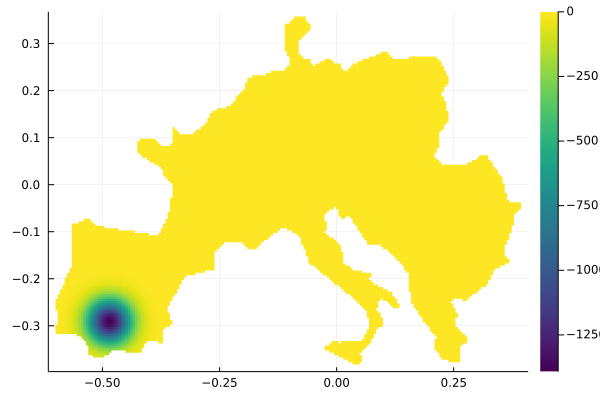

In [19]:
# define a disturbance
dP = -9.0
# dP = 0.0
sigma = 100.0 / scale_factor
location = [-1500.0, -900.0] / scale_factor
dp = local_disturbance(isgrid, xrange, yrange, location, dP, sigma)
dpflat = vec(dp)
println("Synchronized frequency: ", trapz((yrange, xrange), p .+ dp) / trapz((yrange, xrange), d))
println("Synchronized frequency: ", sum(p .+ dp) / sum(d))
hm_plot(isinside, xrange, yrange, dp)


In [23]:
th0 = zeros(Ny * Nx)

ts, ~, omegas = perform_dyn_sim(isgridflat, xi, pflat[isgridflat]+dpflat[isgridflat],
    minvflat, gammaflat, th0, interval = 500, Ndt = Int64(30000), dt = 0.001, method = "crank-nicolson")
o_ref = sum(p .+ dp) / sum(d)
sum(omegas[:,end])/sum(isgridflat) / o_ref

Total time: 30.0
NIter: 500 Avg. Omega: -0.03944029391348776
NIter: 1000 Avg. Omega: -0.0731760189064315
NIter: 1500 Avg. Omega: -0.10125448881273176
NIter: 2000 Avg. Omega: -0.1256928113611828
NIter: 2500 Avg. Omega: -0.14543987256978413
NIter: 3000 Avg. Omega: -0.16221211187159976
NIter: 3500 Avg. Omega: -0.17664280609578933
NIter: 4000 Avg. Omega: -0.18826766806077067
NIter: 4500 Avg. Omega: -0.19868981713349984
NIter: 5000 Avg. Omega: -0.20756604071901147
NIter: 5500 Avg. Omega: -0.21481607172547817
NIter: 6000 Avg. Omega: -0.2208797374228336
NIter: 6500 Avg. Omega: -0.22569715360887396
NIter: 7000 Avg. Omega: -0.23001089188770982
NIter: 7500 Avg. Omega: -0.23384496300982474
NIter: 8000 Avg. Omega: -0.23723049990975095
NIter: 8500 Avg. Omega: -0.24027304426233184
NIter: 9000 Avg. Omega: -0.24267065312886424
NIter: 9500 Avg. Omega: -0.24510509776678374
NIter: 10000 Avg. Omega: -0.247162211464789
NIter: 10500 Avg. Omega: -0.24932807849093316
NIter: 11000 Avg. Omega: -0.25139978404344

0.9589618619039797

In [ ]:
# backward Euler
coord = [500 -250; 0.0 0.0; -500 500; 500. 500.; -1500.0 -1000.0; 750.0 -1000; -1000 -400]/scale_factor
time_plot(ts_be, omegas_be, coord, tstart = 0.0, tend = 50.0, borders = [border])

In [ ]:
# Crank-Nicolson
coord = [500 -250; 0.0 0.0; -500 500; 500. 500.; -1500.0 -1000.0; 750.0 -1000; -1000 -400]
time_plot(ts_cn, omegas_cn, coord, tstart = 0.0, tend = 10.0, borders = [border])

In [ ]:
# "Standard vec"
coord = [500 -250; 0.0 0.0; -500 500; 500. 500.; -1500.0 -1000.0; 750.0 -1000; -1000 -400]
time_plot(ts_v, omegas_v, coord, tstart = 0.0, tend = 10.0, borders = [border])

In [ ]:
heatmap(omegas_be[:,:,10],fill=true)


In [ ]:
-0.26278349229700537 /  -0.27402891005001007